# Product Analysis Specialization

> *If you see errors, you may need to be allow-listed for the Bedrock models used by this notebook*

> *This notebook should work well with the **`Data Science 3.0`** kernel in SageMaker Studio*

## Introduction

In this notebook we show you how to use a LLM to generate code based on the text prompt.

We will use Bedrock's Claude v2 using the Boto3 API. 

The prompt used in this example is called a zero-shot prompt because we are not providing any examples of text other than the prompt.

**Note:** *This notebook can be run within or outside of AWS environment.*

#### Context
To demonstrate the code generation capability of Amazon Bedrock, we will explore the use of Boto3 client to communicate with Amazon Bedrock API. We will demonstrate different configurations available as well as how simple input can lead to desired outputs.

#### Pattern
We will simply provide the Amazon Bedrock API with an input consisting of a task, an instruction and an input for the model under the hood to generate an output without providing any additional example. The purpose here is to demonstrate how the powerful LLMs easily understand the task at hand and generate compelling outputs.

![](./images/bedrock-code-gen.png)

#### Use case
To demonstrate the generation capability of models in Amazon Bedrock, let's take the use case of product analysis

#### Persona

You are a product manager working for a technical firm and wants to be able to track some of the analysis to drive a couple of metrics towards growth to satisfy your product goals and for that, you need to access CSV file


#### Implementation
To fulfill this use case, in this notebook we will show how to generate code for a given prompt. We will use the Anthropic Claude v2 using the Amazon Bedrock API with Boto3 client. 

## Setup

In [3]:
%pip install --no-build-isolation --force-reinstall \
    "boto3>=1.28.57" \
    "awscli>=1.29.57" \
    "botocore>=1.31.57"

%pip install --quiet langchain==0.0.309

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 244.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 263.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 202.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 208.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 183.4 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 308.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 308.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 331.8 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninstall: six
    Found e

In [2]:
import warnings
warnings.filterwarnings('ignore')

%pip install --no-build-isolation --force-reinstall \
    "boto3>=1.28.57" \
    "awscli>=1.29.57" \
    "botocore>=1.31.57"

%pip install --quiet "faiss-cpu>=1.7,<2" langchain==0.0.309 "pypdf>=3.8,<4"
%pip install --upgrade sqlalchemy

%pip install --no-build-isolation --force-reinstall \
    ../dependencies/awscli-*-py3-none-any.whl \
    ../dependencies/boto3-*-py3-none-any.whl \
    ../dependencies/botocore-*-py3-none-any.whl

%pip install --quiet "faiss-cpu>=1.7,<2" langchain==0.0.249 "pypdf>=3.8,<4"

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 275.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 206.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 204.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 29.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 176.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 312.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 210.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 304.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninstall: six
   

In [9]:
# To generate some of the graph analysis for our product
%pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [3]:
import json
import os
import sys

import boto3

module_path = ".."
sys.path.append(os.path.abspath(module_path))
from utils import bedrock, print_ww


# ---- ⚠️ Un-comment and edit the below lines as needed for your AWS setup ⚠️ ----

# os.environ["AWS_DEFAULT_REGION"] = "<REGION_NAME>"  # E.g. "us-east-1"
# os.environ["AWS_PROFILE"] = "<YOUR_PROFILE>"
# os.environ["BEDROCK_ASSUME_ROLE"] = "<YOUR_ROLE_ARN>"  # E.g. "arn:aws:..."

boto3_bedrock = bedrock.get_bedrock_client(
    assumed_role=os.environ.get("BEDROCK_ASSUME_ROLE", None),
    region=os.environ.get("AWS_DEFAULT_REGION", None)
)

Create new client
  Using region: us-east-1
boto3 Bedrock client successfully created!
bedrock-runtime(https://bedrock-runtime.us-east-1.amazonaws.com)


## Code Generation

Following on the use case explained above, let's prepare an input for  the Amazon Bedrock service to generate python program for our use-case.

#### Lab setup - Here, we are creating a CSV file with all data about generative AI products for the PM to go over and drive some metrics


In [5]:
import csv

data = [
    ["product_name", "cost", "positive_reviews", "negative_reviews", "availability", "rating"],
    ["Claude", 75.00, 150, 10, "In Stock", 4.5],
    ["ChatGPT", 199.99, 320, 5, "In Stock", 4.9],
    ["LLaMa", 49.99, 50, 20, "Out of Stock", 3.7],
    ["ProductX", 129.95, 200, 8, "In Stock", 4.2],
    ["ProductY", 89.99, 100, 15, "In Stock", 3.8],
    ["ProductZ", 149.50, 180, 12, "In Stock", 4.1],
    ["ProductA", 39.99, 40, 30, "Out of Stock", 2.9],
    ["ProductB", 79.95, 80, 25, "In Stock", 3.5],
    ["ProductC", 199.00, 300, 3, "In Stock", 4.7],
    ["ProductD", 69.99, 120, 18, "In Stock", 4.0],
    ["Claude", 75.00, 150, 10, "In Stock", 4.5],
    ["ChatGPT", 199.99, 320, 5, "In Stock", 4.9],
    ["LLaMa", 49.99, 50, 20, "Out of Stock", 3.7],
    ["ProductX", 129.95, 200, 8, "In Stock", 4.2],
    ["ProductY", 89.99, 100, 15, "In Stock", 3.8],
    ["ProductZ", 149.50, 180, 12, "In Stock", 4.1],
    ["ProductA", 39.99, 40, 30, "Out of Stock", 2.9],
    ["ProductB", 79.95, 80, 25, "In Stock", 3.5],
    ["ProductC", 199.00, 300, 3, "In Stock", 4.7],
    ["ProductD", 69.99, 120, 18, "In Stock", 4.0],
    ["ProductE", 119.99, 90, 5, "In Stock", 4.3],
    ["ProductF", 59.95, 70, 12, "Out of Stock", 3.2],
    ["ProductG", 199.99, 230, 7, "In Stock", 4.6],
    ["ProductH", 69.99, 100, 22, "In Stock", 3.4],
    ["ProductI", 89.95, 180, 10, "In Stock", 4.5],
    ["ProductJ", 99.99, 60, 18, "Out of Stock", 3.0],
    ["ProductK", 129.99, 200, 14, "In Stock", 4.2],
    ["ProductL", 79.95, 50, 8, "In Stock", 3.9],
    ["ProductM", 149.99, 210, 6, "In Stock", 4.4],
    ["ProductN", 49.95, 30, 14, "Out of Stock", 2.7],
    ["ProductO", 99.95, 100, 20, "In Stock", 3.6],
    ["ProductP", 149.95, 140, 4, "In Stock", 4.8],
    ["ProductQ", 69.99, 110, 9, "In Stock", 4.1],
    ["ProductR", 79.95, 60, 18, "Out of Stock", 2.8],
    ["ProductS", 119.99, 180, 13, "In Stock", 4.3],
    ["ProductT", 89.99, 70, 25, "In Stock", 3.5],
    ["ProductU", 139.99, 150, 8, "In Stock", 4.0],
    ["ProductV", 59.95, 30, 15, "Out of Stock", 2.5],
    ["ProductW", 69.99, 110, 7, "In Stock", 4.2],
    ["ProductX", 79.95, 40, 20, "In Stock", 3.7],
]

    
with open('genAIproducts.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

print("generativeAIProducts has been created!")

generativeAIProducts has been created!


#### Analyzing sales with Amazon Bedrock generated Python program

In [6]:
## Claude Personalization to create analysis

prompt_data = """

Human: You have a CSV called genAIproducts.csv. You have the follow columns
- product_name
- cost
- positive_reviews
- negative_reviews
- availability
- rating

Create a python program to analyze the product data from a CSV file. The program should be able to read the data, and determine below:

- Total estimated product positive ratings in the future
- Potential loss in customer retention because of the negative reviews
- sorting the products based on availabilities and customer reviews

Ensure the code is syntactically correct, bug-free, optimized, not span multiple lines unnessarily, and prefer to use standard libraries. Return only python code without any surrounding text, explanation or context.

Assistant:
"""

Let's start by using the Anthropic Claude V2 model.

In [7]:
body = json.dumps({
                    "prompt": prompt_data,
                    "max_tokens_to_sample":4096,
                    "temperature":0.5,
                    "top_k":250,
                    "top_p":0.5,
                    "stop_sequences": ["\n\nHuman:"]
                  }) 

#### Invoke the Anthropic Claude v2 model

In [9]:
modelId = 'anthropic.claude-v2' # change this to use a different version from the model provider
accept = 'application/json'
contentType = 'application/json'

response = boto3_bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
response_body = json.loads(response.get('body').read())

print_ww(response_body.get('completion'))

 Here is the Python code to analyze the product data from the genAIproducts.csv file:

```python
import csv
from operator import itemgetter

total_pos_reviews = 0
total_neg_reviews = 0

with open('genAIproducts.csv', 'r') as f:
    reader = csv.DictReader(f)
    data = list(reader)

for product in data:
    total_pos_reviews += int(product['positive_reviews'])
    total_neg_reviews += int(product['negative_reviews'])

print(f"Total estimated positive reviews: {total_pos_reviews}")

retention_loss = total_neg_reviews / len(data)
print(f"Potential customer retention loss: {retention_loss:.2f}")

sorted_data = sorted(data, key=itemgetter('availability', 'rating'), reverse=True)

print("Products sorted by availability and rating:")
for product in sorted_data:
    print(product['product_name'])
```


#### (Optional) Execute the Bedrock generated code for validation. Go to text editor to copy the generated code as printed output can be trucncated. Replce the code in below cell.

Total estimated positive reviews: 5290
Potential customer retention loss: 13.68


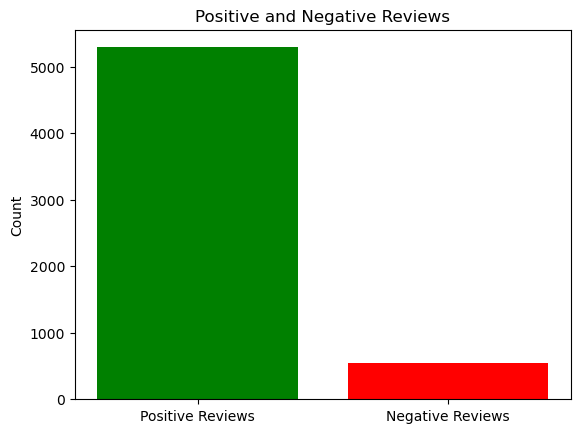

Products sorted by availability and rating:
LLaMa
LLaMa
ProductF
ProductJ
ProductA
ProductA
ProductR
ProductN
ProductV
ChatGPT
ChatGPT
ProductP
ProductC
ProductC
ProductG
Claude
Claude
ProductI
ProductM
ProductE
ProductS
ProductX
ProductX
ProductK
ProductW
ProductZ
ProductZ
ProductQ
ProductD
ProductD
ProductU
ProductL
ProductY
ProductY
ProductX
ProductO
ProductB
ProductB
ProductT
ProductH


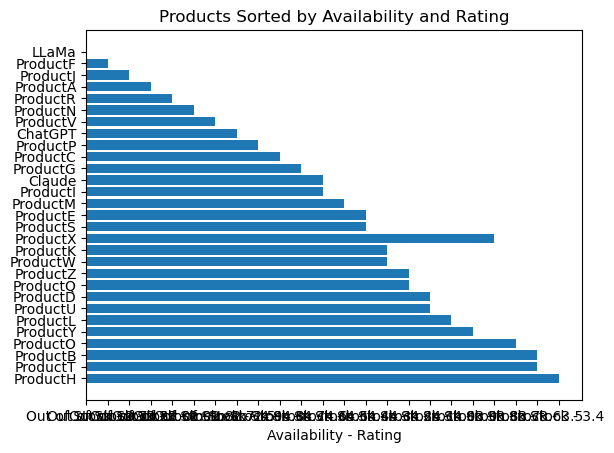

In [11]:
import csv
from operator import itemgetter
import matplotlib.pyplot as plt

total_pos_reviews = 0
total_neg_reviews = 0

with open('genAIproducts.csv', 'r') as f:
    reader = csv.DictReader(f)
    data = list(reader)

for product in data:
    total_pos_reviews += int(product['positive_reviews'])
    total_neg_reviews += int(product['negative_reviews'])

print(f"Total estimated positive reviews: {total_pos_reviews}")

retention_loss = total_neg_reviews / len(data)
print(f"Potential customer retention loss: {retention_loss:.2f}")

# Create a bar chart for positive and negative reviews
labels = ['Positive Reviews', 'Negative Reviews']
values = [total_pos_reviews, total_neg_reviews]
plt.bar(labels, values, color=['green', 'red'])
plt.title('Positive and Negative Reviews')
plt.ylabel('Count')
plt.show()

sorted_data = sorted(data, key=itemgetter('availability', 'rating'), reverse=True)

print("Products sorted by availability and rating:")
for product in sorted_data:
    print(product['product_name'])

# Create a horizontal bar chart for products sorted by availability and rating
product_names = [product['product_name'] for product in sorted_data]
availability_rating = [f"{product['availability']} - {product['rating']}" for product in sorted_data]

plt.barh(product_names, availability_rating)
plt.xlabel('Availability - Rating')
plt.title('Products Sorted by Availability and Rating')
plt.gca().invert_yaxis()
plt.show()
